In [1]:
## Import libraries
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, Flatten


In [2]:
# Load test and train data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Understanding test and train data
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

print(X_train.shape) 
print(Y_train.shape) 
print(X_test.shape) 
print(Y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# check the min and max values
np.min(X_train), np.max(X_train)
#np.min(Y_train), np.max(Y_test)



(0.0, 255.0)

In [5]:
# Normalize the data
X_train /= 255
X_test /= 255

# Check min and max values
np.min(X_train), np.max(X_train)


(0.0, 1.0)

In [6]:
# make y data categorical
no_of_classes = 10
Y_train = keras.utils.to_categorical(Y_train, no_of_classes)
Y_test = keras.utils.to_categorical(Y_test, no_of_classes)

In [ ]:
# Train the model from section 1 with 0.25 noise factor
# Model1
model1 = keras.Sequential()

# Add Layers
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

# Model1 summary
model1.summary()

# Compile the model1
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add noise
noise_factor = 0.25
X_train_noisy_25 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_25 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_25 = np.clip(X_train_noisy_25, 0. , 1.)
X_test_noisy_25 = np.clip(X_test_noisy_25, 0. , 1.)

# Fit the model1 with 
model1.fit(X_train_noisy_25, Y_train, batch_size=128, epochs=15, validation_split=0.1)

# Evaluate the model1
score = model1.evaluate(X_test_noisy_25, Y_test, verbose=0)
print("Model accuracy: ", score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
____________________________________________________

In [ ]:
# Train the model from section 1 with 0.25 noise factor. Add 1 more layer
# Model2
model2 = keras.Sequential()

# Add Layers
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

# Model2 summary
model2.summary()

# Compile the model2
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add noise
noise_factor = 0.25
X_train_noisy_25 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_25 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_25 = np.clip(X_train_noisy_25, 0. , 1.)
X_test_noisy_25 = np.clip(X_test_noisy_25, 0. , 1.)

# Fit the model2 with 
model2.fit(X_train_noisy_25, Y_train, batch_size=128, epochs=15, validation_split=0.1)

# Evaluate the model2
score = model2.evaluate(X_test_noisy_25, Y_test, verbose=0)
print("Model accuracy: ", score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [ ]:
# Train the model from section 1 with 0.25 noise factor. Add 2 layers
# Model1
model3 = keras.Sequential()

# Add Layers
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(20, activation='softmax'))
model3.add(Dense(10, activation='softmax'))

# Model3 summary
model3.summary()

# Compile the model3
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add noise
noise_factor = 0.25
X_train_noisy_25 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_25 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_25 = np.clip(X_train_noisy_25, 0. , 1.)
X_test_noisy_25 = np.clip(X_test_noisy_25, 0. , 1.)

# Fit the model3 with 
model3.fit(X_train_noisy_25, Y_train, batch_size=128, epochs=15, validation_split=0.1)

# Evaluate the model3
score = model3.evaluate(X_test_noisy_25, Y_test, verbose=0)
print("Model accuracy: ", score[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)               

In [ ]:
# Train the model from section 1 with 0.25 noise factor. Add one conv layer and one dense layers
# Model4
model4 = keras.Sequential()

# Add Layers
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(20, activation='softmax'))
model4.add(Dense(10, activation='softmax'))

# Model4 summary
model4.summary()

# Compile the model4
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add noise
noise_factor = 0.25
X_train_noisy_25 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_25 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_25 = np.clip(X_train_noisy_25, 0. , 1.)
X_test_noisy_25 = np.clip(X_test_noisy_25, 0. , 1.)

# Fit the model4 with 
model4.fit(X_train_noisy_25, Y_train, batch_size=128, epochs=15, validation_split=0.1)

# Evaluate the model4
score = model4.evaluate(X_test_noisy_25, Y_test, verbose=0)
print("Model accuracy: ", score[1])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                32020     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [ ]:
# Train the model from section 1 with 0.25 noise factor. Add one conv layer and one dense layers
# Model5
model5 = keras.Sequential()

# Add Layers
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(16, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(16, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(Flatten())
model5.add(Dense(10, activation='softmax'))
model5.add(Dense(10, activation='softmax'))

# Model5 summary
model5.summary()

# Compile the model5
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add noise
noise_factor = 0.25
X_train_noisy_25 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_25 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_25 = np.clip(X_train_noisy_25, 0. , 1.)
X_test_noisy_25 = np.clip(X_test_noisy_25, 0. , 1.)

# Fit the model5 with 
model5.fit(X_train_noisy_25, Y_train, batch_size=128, epochs=15, validation_split=0.1)

# Evaluate the model5
score = model5.evaluate(X_test_noisy_25, Y_test, verbose=0)
print("Model accuracy: ", score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 16)          2320      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16)               

In [ ]:
# Train the model from section 1 with 0.25 noise factor. Add one conv layer and one dense layers
# Model6
model6 = keras.Sequential()

# Add Layers
model6.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(32, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(Flatten())
model6.add(Dense(10, activation='softmax'))
model6.add(Dense(20, activation='softmax'))
model6.add(Dense(10, activation='softmax'))

# Model6 summary
model6.summary()

# Compile the model6
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add noise
noise_factor = 0.25
X_train_noisy_25 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_25 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_25 = np.clip(X_train_noisy_25, 0. , 1.)
X_test_noisy_25 = np.clip(X_test_noisy_25, 0. , 1.)

# Fit the model6 with 
model6.fit(X_train_noisy_25, Y_train, batch_size=128, epochs=15, validation_split=0.1)

# Evaluate the model6
score = model6.evaluate(X_test_noisy_25, Y_test, verbose=0)
print("Model accuracy: ", score[1])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 64)              

In [13]:
# Try with Autoencoders


# Encoding
input_img_shape = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_shape)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoding

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img_shape, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Add noise
noise_factor = 0.25
X_train_noisy_25 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_25 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_25 = np.clip(X_train_noisy_25, 0. , 1.)
X_test_noisy_25 = np.clip(X_test_noisy_25, 0. , 1.)


autoencoder.fit(X_train_noisy_25, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy_25, X_test))




Epoch 1/100
469/469 [==============================] - 148s 314ms/step - loss: 0.2173 - val_loss: 0.0889
Epoch 2/100
469/469 [==============================] - 145s 309ms/step - loss: 0.0878 - val_loss: 0.0827
Epoch 3/100
469/469 [==============================] - 145s 309ms/step - loss: 0.0829 - val_loss: 0.0802
Epoch 4/100
469/469 [==============================] - 146s 311ms/step - loss: 0.0806 - val_loss: 0.0788
Epoch 5/100
469/469 [==============================] - 145s 310ms/step - loss: 0.0792 - val_loss: 0.0778
Epoch 6/100
469/469 [==============================] - 145s 309ms/step - loss: 0.0782 - val_loss: 0.0771
Epoch 7/100
469/469 [==============================] - 144s 307ms/step - loss: 0.0775 - val_loss: 0.0764
Epoch 8/100
469/469 [==============================] - 144s 308ms/step - loss: 0.0768 - val_loss: 0.0763
Epoch 9/100
469/469 [==============================] - 145s 310ms/step - loss: 0.0763 - val_loss: 0.0757
Epoch 10/100
469/469 [==============================] -

In [16]:
all_denoised_images = autoencoder.predict(X_test_noisy_25)


In [18]:
test_loss  = autoencoder.evaluate(X_test_noisy_25, X_test, batch_size = 20)


500/500 [==============================] - 7s 15ms/step - loss: 0.0726


In [19]:
print(test_loss)

0.07262732833623886


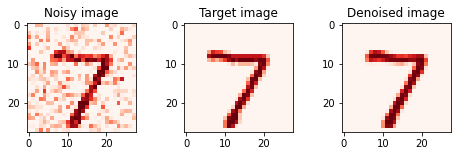

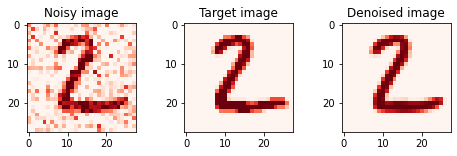

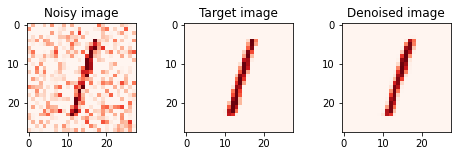

In [22]:
dimension = X_train.shape[1]
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 2)
    axes[0].set_title('Noisy image')
    im0 = axes[0].imshow(X_test_noisy_25[i].reshape(dimension, dimension), cmap = 'Reds')
    axes[1].set_title('Target image')
    im1 = axes[1].imshow(X_test[i].reshape(dimension, dimension), cmap = 'Reds')
    axes[2].set_title('Denoised image')
    im2 = axes[2].imshow(all_denoised_images[i].reshape(dimension, dimension), cmap = 'Reds')
    plt.savefig(f'comparison-{i}.png')